# Data Loading and Exploration

## Load the data

In [23]:
import pandas as pd
import numpy as np
data = pd.read_csv("data/train.csv")
data.head()
target_column_label = 'Survived'
X = data.loc[:, data.columns != target_column_label]
y = data.loc[:, data.columns == target_column_label]
y = np.ravel(y) # for training purposes lateron

## Explore the data

In [31]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Pears, Mrs. Thomas (Edith Wearne)",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


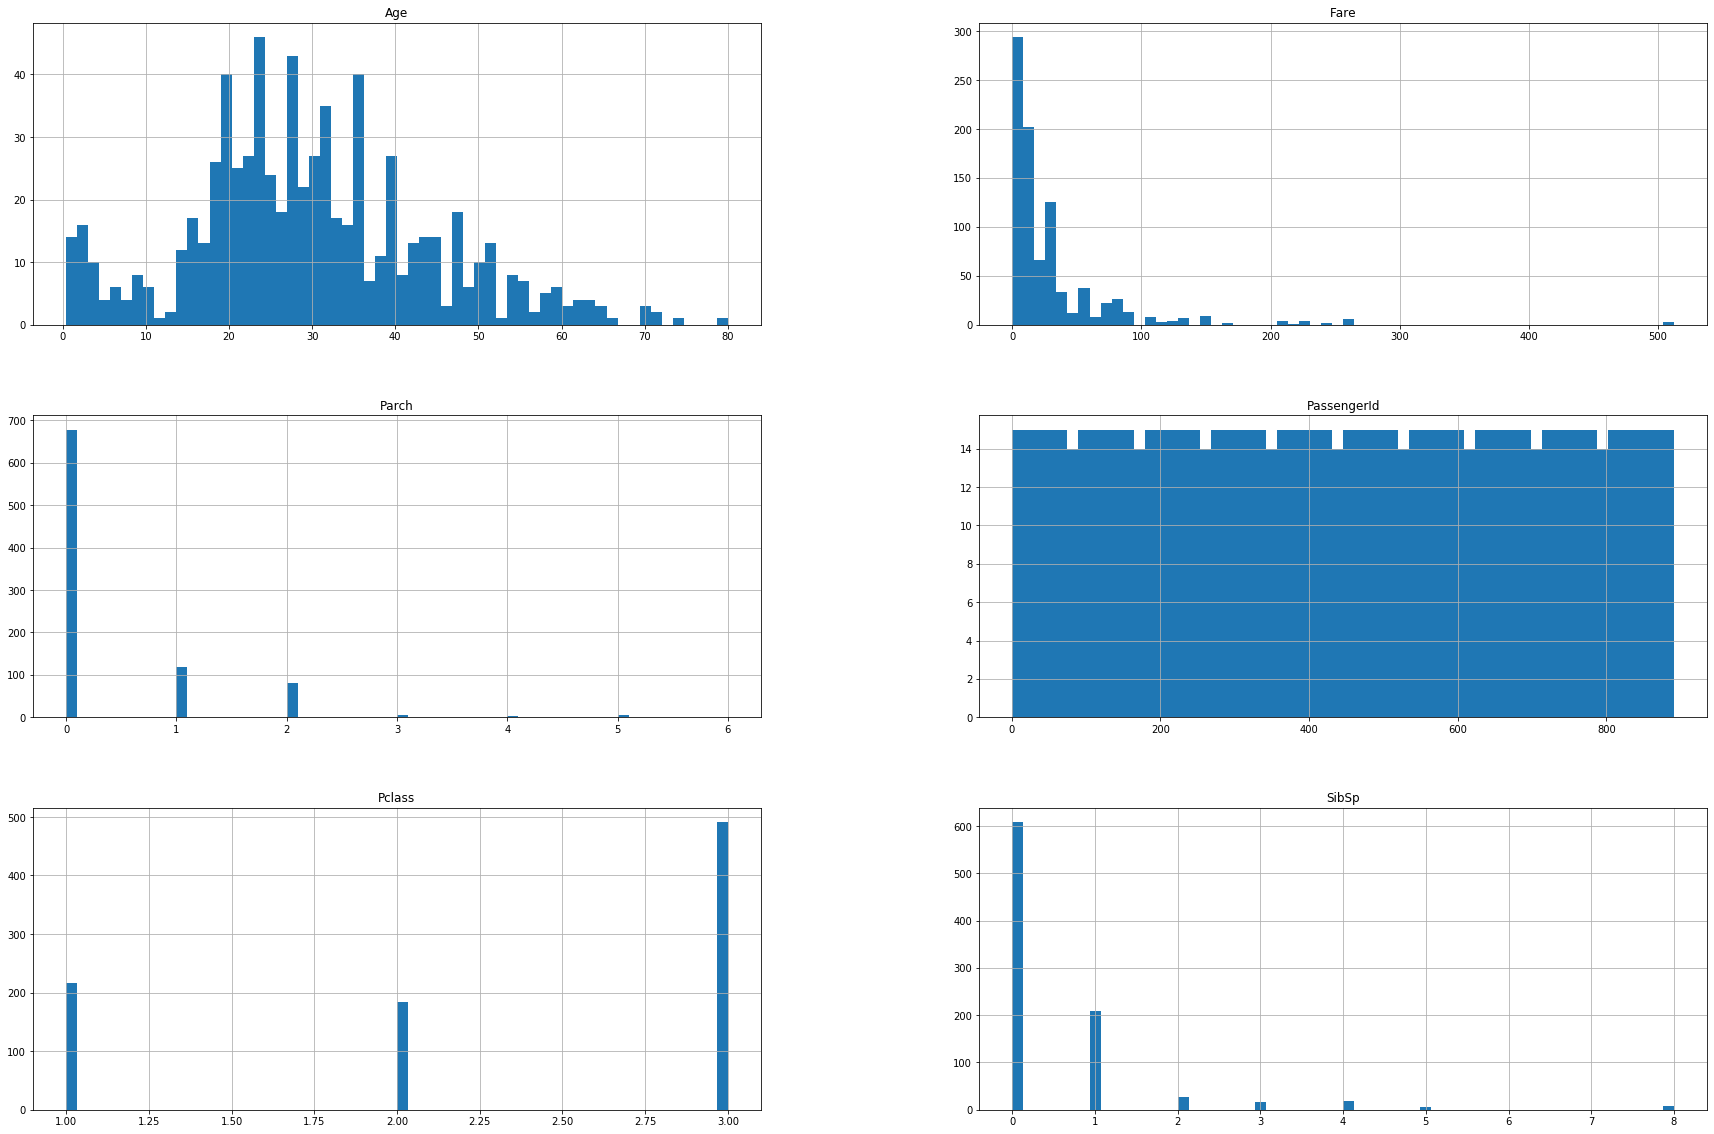

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
X.hist(bins=60, figsize=(30,20))
plt.show()

### Find the right features

In [8]:
corr_matrix = data.corr()
corr_matrix[target_column_label].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10896a090>,
      dtype=object)

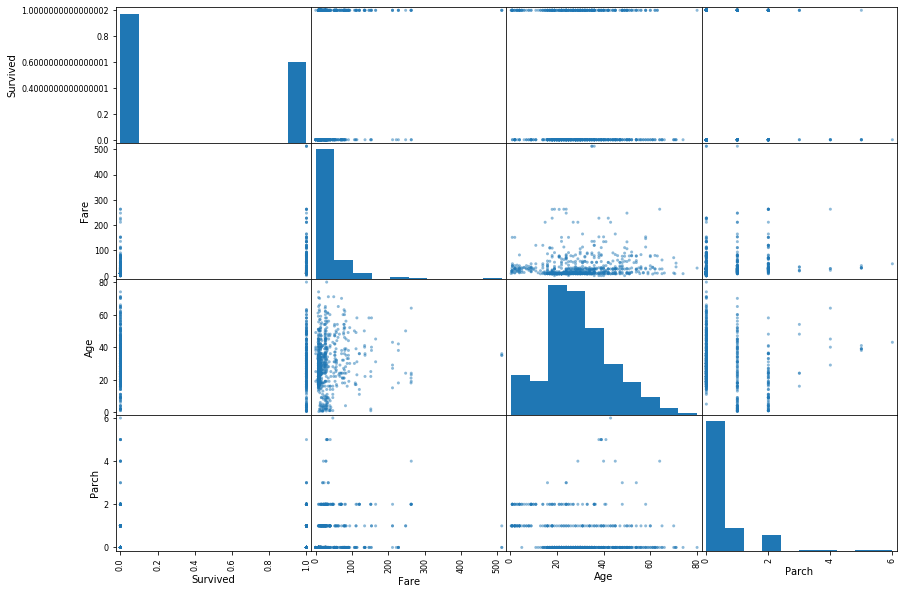

In [9]:
# promising attributes
corr_attributes = [target_column_label, 'Fare', 'Age', 'Parch']

from pandas.plotting import scatter_matrix
scatter_matrix(data[corr_attributes], figsize=(14,10))

# Data Transformation

In [44]:
X['Embarked'].value_counts().sort_values(ascending=False).index[0]

'S'

In [47]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

drop_columns = ['Cabin', 'Ticket', 'PassengerId', 'Name']
numerical_features = ['Age', 'Fare']
ordinal_features = ['SibSp', 'Parch', 'Pclass']
categorical_features = ['Sex', 'Embarked']

class CustomTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # here we implement all the custom transformations that are needed for this data
        
        # drop unneccessay columns
        drop_columns = ['Cabin', 'Ticket', 'PassengerId', 'Name', 'Survival']
        X = X.drop(drop_columns,axis=1, errors="ignore")
        
        # there were 2 missing values from 'Embarked', fill those with the most common value
        embarked_most_common = X['Embarked'].value_counts().sort_values(ascending=False).index[0]
        X['Embarked'].fillna(embarked_most_common, inplace=True)

        # performs several transformations on the according columns
        ct = ColumnTransformer(
            [
                ('encode_categorical', OneHotEncoder(), categorical_features),
                ('impute_scale', make_pipeline(SimpleImputer(), StandardScaler()), numerical_features)
            ], remainder='passthrough'
        )

        # return the transformed data
        return pd.DataFrame(ct.fit_transform(X))

### Transform and Check

In [48]:
ct = CustomTransformer()
X_tr = ct.fit_transform(X)

print(X_tr.info())
X_tr.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       891 non-null    float64
 1   1       891 non-null    float64
 2   2       891 non-null    float64
 3   3       891 non-null    float64
 4   4       891 non-null    float64
 5   5       891 non-null    float64
 6   6       891 non-null    float64
 7   7       891 non-null    float64
 8   8       891 non-null    float64
 9   9       891 non-null    float64
dtypes: float64(10)
memory usage: 69.7 KB
None


,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,0.0,1.0,-0.592481,-0.502445,3.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.638789,0.786845,1.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,-0.284663,-0.488854,3.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.407926,0.420730,1.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.407926,-0.486337,3.0,0.0,0.0


# Predicting Data

### Find the best baseline model

In [49]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from sklearn.model_selection import train_test_split

# get validation data set
X_train, X_val, y_train, y_val = train_test_split(X_tr, y, random_state=42)

models = [
    SVC(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    LogisticRegression()
]

scores = [
    accuracy_score, f1_score, precision_score, recall_score
]

# train on every model and get results
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    print(f'--- {type(model).__name__} ---')
    for score in scores:
        print(f'{score.__name__:<30}: {round(score(y_pred, y_val)*100,2)} %')
        
    print('\n')
    

--- SVC ---
accuracy_score                : 82.51 %
f1_score                      : 76.92 %
precision_score               : 73.03 %
recall_score                  : 81.25 %


--- DecisionTreeClassifier ---
accuracy_score                : 73.09 %
f1_score                      : 66.29 %
precision_score               : 66.29 %
recall_score                  : 66.29 %


--- KNeighborsClassifier ---
accuracy_score                : 80.27 %
f1_score                      : 75.0 %
precision_score               : 74.16 %
recall_score                  : 75.86 %


--- LogisticRegression ---
accuracy_score                : 80.72 %
f1_score                      : 75.14 %
precision_score               : 73.03 %
recall_score                  : 77.38 %




# Searching the best Params for our model

In [13]:
from sklearn.model_selection import GridSearchCV

# select promising parameters
param_grid = [
    {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['rbf', 'poly', 'linear']}
]
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_tr,y)
grid_search.best_params_

{'C': 0.01, 'gamma': 1, 'kernel': 'poly'}

In [14]:
grid_search.best_score_

0.8260310087251271

# Build final pipeline

In [52]:
from sklearn.pipeline import Pipeline
prediction_pipeline = Pipeline(
    [
        ('Transformation', CustomTransformer()),
        ('Prediction', SVC(grid_search.best_params_))
    ]
)

In [53]:
# train on current training data once again
prediction_pipeline.fit(X, y)

TypeError: must be real number, not dict

# Predict Test data

In [25]:
# get test data 
test = pd.read_csv('data/test.csv')
X_target = test.loc[:, X.columns != target_column_label]

In [26]:
# predict on test data
test['Survived'] = prediction_pipeline.predict(X_target)

In [29]:
submission = test.loc[:, ['PassengerId', 'Survived']]
submission.to_csv('data/submission.csv', index=False)

In [30]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
